In [1]:
import sys
sys.path.append('../')
from fcc import *

In [16]:
retina = couscous.from_file('../inputs/GSM1626793_P14Retina_1.processed.norowlabels.tsv.gz', data_type='counts', labels=[None, 0], barcodefile='pymethods_out/retina_clu.csv')

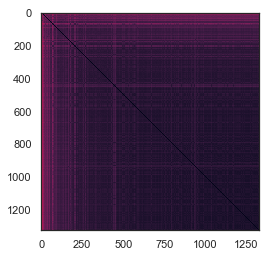

In [4]:
plt.imshow(retina.distance_matrix())

In [17]:
retina.fcc_PCA(data_type='counts', transform='arcsinh', n_components=50)

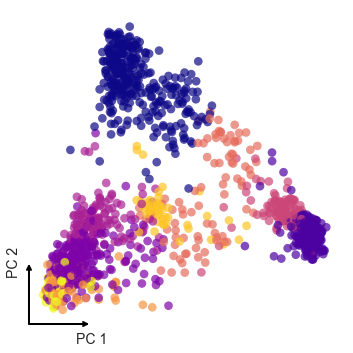

In [25]:
retina.plot_barcodes('PCA')

In [18]:
retina.fcc_UMAP(data_type='PCA', perplexity=30, seed=18)

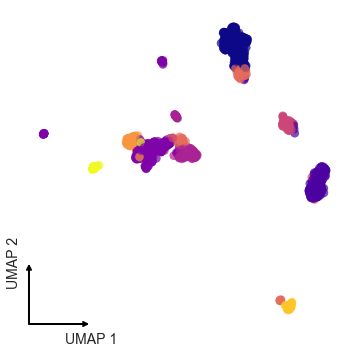

In [19]:
retina.plot_barcodes('UMAP')

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x114513358>)

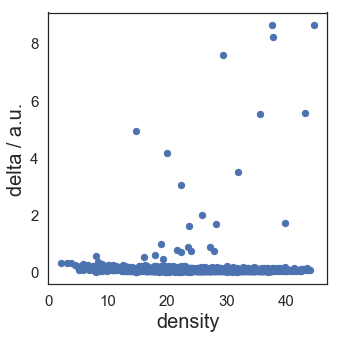

In [21]:
retina.clu['UMAP'].draw_decision_graph()

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11725e240>)

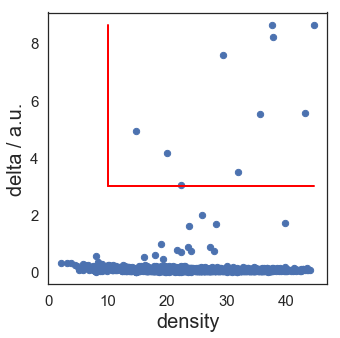

In [30]:
retina.clu['UMAP'].assign(10,3)
retina.clu['UMAP'].draw_decision_graph(min_delta=retina.clu['UMAP'].min_delta, min_density=retina.clu['UMAP'].min_density)

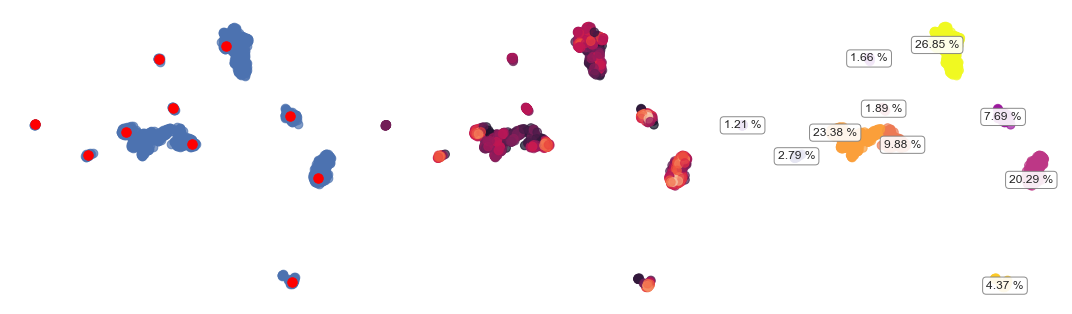

In [31]:
retina.plot_clusters(data_type='UMAP')

In [34]:
retina.cluster_counts(data_type='UMAP')

37 cells in cluster 0 (2.79 %)

16 cells in cluster 1 (1.207 %)

22 cells in cluster 2 (1.659 %)

102 cells in cluster 3 (7.692 %)

269 cells in cluster 4 (20.287 %)

25 cells in cluster 5 (1.885 %)

131 cells in cluster 6 (9.879 %)

310 cells in cluster 7 (23.379 %)

58 cells in cluster 8 (4.374 %)

356 cells in cluster 9 (26.848 %)



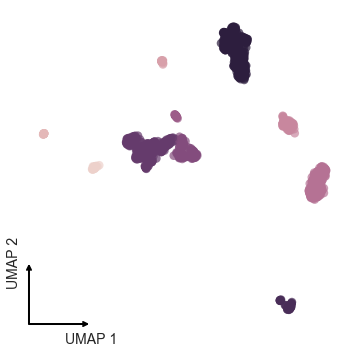

In [32]:
retina.plot('UMAP', color=retina.clu['UMAP'].membership)

In [49]:
four = retina.data['PCA'][retina.clu['UMAP'].membership==4].mean(axis=0)

In [50]:
eight = retina.data['PCA'][retina.clu['UMAP'].membership==8].mean(axis=0)

In [61]:
np.column_stack((four, eight)).mean(axis=1)

array([ 6.68641378e+00, -1.22565253e+00,  7.69129825e+00,  2.70233277e-01,
        3.11938590e-02,  4.09733555e-01, -4.99374870e-01, -2.19116723e-01,
        6.18542047e-02, -2.47501770e-01, -2.01129312e-01, -2.65511828e-01,
        1.63571357e-01,  2.75808440e-01, -1.23441911e-01,  2.18093964e-01,
        6.21234520e-02,  3.96082632e-02,  1.92659401e-01, -2.06934084e-02,
       -1.38186994e-01,  2.37162127e-01,  2.92904985e-02,  2.16925367e-02,
        7.63276318e-02, -1.00314147e-01, -2.14088664e-02,  1.14013261e-01,
       -2.88851945e-02, -8.92888108e-02,  2.65231357e-02, -4.76524387e-03,
       -4.19342295e-02, -1.50523278e-02,  4.90133870e-02, -2.09237890e-02,
       -4.31429674e-02, -1.47495201e-02,  5.54344892e-02, -9.59825823e-03,
       -5.23168442e-02, -5.50371107e-02, -1.26900215e-02, -2.80294305e-02,
        2.16693341e-02, -1.68899841e-02,  1.65583178e-02,  8.20859623e-03,
        1.87702467e-02,  2.74458259e-02])

In [69]:
retina.data['PCA']

array([[-12.43209654,  -5.3845984 ,  -3.40429956, ...,   0.04058613,
          0.13154216,   0.03176502],
       [-12.21958645,  -5.55184854,  -3.5377934 , ...,  -0.50916473,
          0.03399205,   0.07914473],
       [-12.21674203,  -5.07993559,  -2.64761211, ...,  -0.19035862,
         -0.1417507 ,   0.23329699],
       ...,
       [ 14.24817546,  -2.64446306,   2.40146669, ...,  -1.9253075 ,
         -1.33972539,  -2.87610757],
       [ 13.91326533,  -2.06960526,   0.58877206, ...,   1.90180327,
         -0.44526974,   1.66456007],
       [ 13.70346088,  -1.93738895,   0.17243095, ...,  -0.41856157,
          0.37091634,   0.16180257]])

In [76]:
retina.data['PCA'] = np.vstack((retina.data['PCA'], np.column_stack((four, eight)).mean(axis=1)))

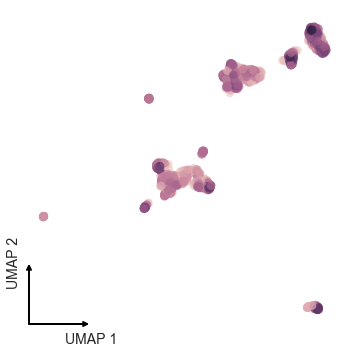

In [77]:
retina.fcc_UMAP(data_type='PCA', perplexity=30, seed=18)
retina.plot('UMAP')

In [86]:
retina.barcodes = retina.barcodes.append(pd.Series(9, index=[1327]))

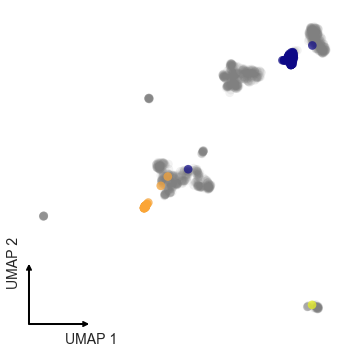

In [90]:
retina.plot_barcodes('UMAP', ranks=['9','8','4'])